<div style="border:solid green 3px; padding: 20px">
<b>🥇 Ата, спасибо за доработки, проект принят, молодец!</b>
    
Ты провел хорошую работу над ошибками! Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂
    

<div style="border:solid green 2px; padding: 20px">
Ата, привет! Меня зовут Ефимов Денис и сегодня я буду делать ревью твоего проекта!
    
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> Некритичное замечание, рекомендация.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Ты проделал огромную работу :)
- У меня есть несколько замечаний, исправив которые ты сделаешь проект  лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Правильно, что импортируешь все библиотеки в отдельной ячейке!  </div>

In [2]:
 data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

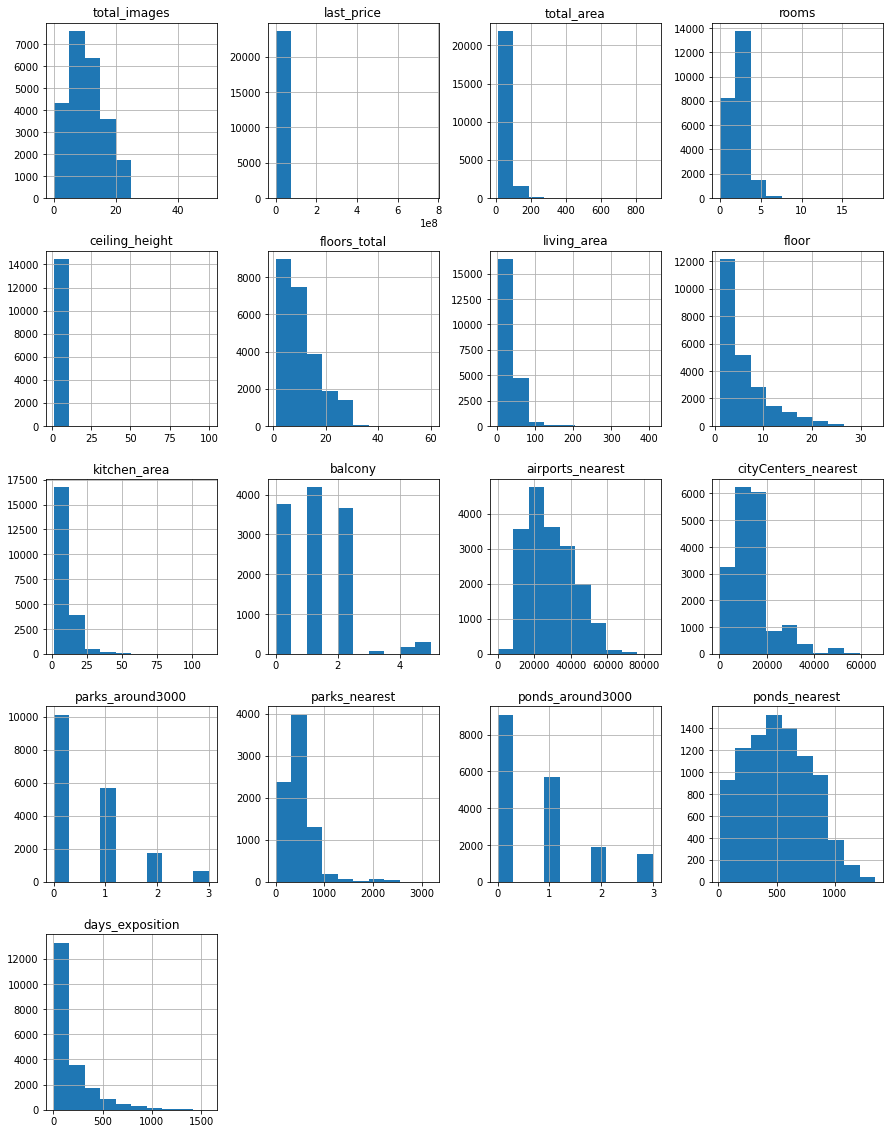

In [5]:
data.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Чтобы перед графиком не выводился длинный список с параметрами, можно просто добавить строку `plt.show()` после строки построения графика.  </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

- Есть достаточно много пропущеных значений. Возможно не все они нам во вред. Возможно что-то можно будет оставить.
- В некоторых колонках можно отбросить десятые доли и перевести данные в целые числа.
- Колонку с датами нужно перевести в формат даты.
- Колонку с городами проверить на наличие повторов, провести лемматизацию и заменить значения.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
После каждого пункта нужно делать промежуточный вывод.
    
Что мы можем сказать о данных после первичного знакомства  с ними? Стоит отметить объем и полноту данных, корректность наименования столбцов и соответствие типов данных.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

### Выполните предобработку данных

Незаполненные пользователями поля:


Опциональные поля (balcony, floors_total, ceiling_height)

Неприменимые поля (не все квартиры имеют кухню, поэтому kitchen_area может быть пропущена)


Неизвестные значения:


Расстояния до объектов (parks_nearest, ponds_nearest) могут быть неизвестны

Местоположение (locality_name) может быть не указано


Удаление при предобработке:


Пропуски могут появиться, если удалять строки с некорректными значениями

In [6]:
fill_zero_columns = ['balcony', 'parks_around3000', 'ponds_around3000']

# Заполнение нулями выбранных столбцов 
data[fill_zero_columns] = data[fill_zero_columns].fillna(0)

In [7]:
# Заполнение пропусков медианой в столбцах расстояний
#for col in ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']:
#    data[col] = data[col].fillna(data[col].median())

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Заполнять пропуски нулями в столбцах с расстояниями некорректно. Ведь тогда получается, что объект будет находится в непосредственной близости от квартиры.

</div>

Я заполнил медианой

Закомментировал строчки кода, сразу поменялись среднее по столбцам, медиана осталась прежней(аномалиям не подвержена)

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b> 
    
Обрати внимание на то, что эти значения  получены автоматически на основе картографических данных. А если данные не получены, то скорее всего объекта рядом нет (пруды и парки) или до объекта слишком далеко и эту информацию нельзя получить (а значит она и не будет иметь значения при исследовании)
    
А заполняя пропуски медианой, мы переносим квартиры и сажаем рядом парки и выкапываем пруды)) Это неправильно. Лучше в таком случае оставить пропуски как есть.
    
Аэропорты тоже есть не во всех населенных пунктах и не все они являются городами, чтобы для них определять расстояние до центра.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

In [8]:
#mean_fill_columns = ['floors_total', 'living_area', 'kitchen_area']
#for col in mean_fill_columns:
#    data[col] = data[col].fillna(data[col].mean())


In [9]:
# Вычисление коэффициентов жилой площади и площади кухни
living_area_ratio = data.loc[data['living_area'] + data['kitchen_area'] <= data['total_area'], 'living_area'].mean() / data.loc[data['living_area'] + data['kitchen_area'] <= data['total_area'], 'total_area'].mean()
kitchen_area_ratio = data.loc[data['living_area'] + data['kitchen_area'] <= data['total_area'], 'kitchen_area'].mean() / data.loc[data['living_area'] + data['kitchen_area'] <= data['total_area'], 'total_area'].mean()

# Заполнение пропусков в жилой площади и площади кухни на основе общей площади
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * living_area_ratio
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'total_area'] * kitchen_area_ratio

In [10]:
# Заполнение пропусков в высоте потолков медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [11]:
# код ревьюера
display(data[data['floors_total'] < data['floor']].shape[0])
data[data['total_area'] < data['living_area'] + data['kitchen_area']].shape[0]

0

118

После добавления коэффициента, остались 118 квартир с аномальными значениями, я решил пересчитать жилую площадь и площадь кухни на основе общей площади, надеюсь, что это правильно

In [12]:
# Идентификация аномальных строк
anomaly_rows = data[data['living_area'] + data['kitchen_area'] > data['total_area']]

# Печать количества аномальных строк
print(f"Аномальные значения: {len(anomaly_rows)}")

Аномальные значения: 118


In [13]:
# Стратегия: Пересчет жилой площади и площади кухни на основе общей площади
data.loc[anomaly_rows.index, 'living_area'] = data.loc[anomaly_rows.index, 'total_area'] * living_area_ratio
data.loc[anomaly_rows.index, 'kitchen_area'] = data.loc[anomaly_rows.index, 'total_area'] * kitchen_area_ratio

In [14]:
data.loc[data['total_area'] < data['living_area'] + data['kitchen_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Пропуски в высоте потолка лучше заполнить медианой, она менее чувствительна к аномальным значениям, а они у нас есть.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
 - У 34 квартир этаж расположения больше общего количества этажей в доме. Корректно ли такое заполнение? Пропусков не так много, их можно исключить или оставить как есть.
 - Получили 1077 квартир, у которых сумма жилой площади и площади кухни больше общей. Такое заполнение пропусков в площадях некорректно. Пропуски можно заполнить так: сначала вычисляем среднее отношение жилой площади к общей, это будет наш коэффициент жилой площади. Далее в строках с пропусками умножаем общую площадь на этот коэффициент, получая жилую площадь. Подобным образом можно заполнить пропуски и в столбце с площадью кухни.
    
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [15]:
data['is_apartment'] = data['is_apartment'].astype(bool)
data['is_apartment'] = data['is_apartment'].fillna(False)

Я просто удалил эту ячейку.(Хотел закомментировать ее, но поспешил)

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Заполнять пропуски в количестве дней размещения некорректно, они означают ,что объявления были активны на момент выгрузки, то есть квартиры не были проданы. А заполняя пропуски мы делаем эти квартиры "проданными", это повлияет на результаты исследования.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [16]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [18]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.875579,9,True,...,27.569525,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Тип данных важно привести к подходящему для дальнейшей обработки:


Правильный тип обеспечит корректные вычисления и сравнения

Это позволит применять специфичные для типа операции (например, работа с датами)

Это сэкономит память (например, булев тип занимает меньше места, чем строковый)

Это улучшит читаемость и ясность кода

In [20]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

In [21]:
unique_names = data['locality_name'].unique()
print(len(unique_names))
print(unique_names)

365
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый

In [22]:
print(len(unique_names))

365


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Количество уникальных значений в столбце можно узнать с помощью метода `nunique()`  </div>

In [23]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')  # Замена "ё" на "е"
    .str.replace(r'\b(дер\.|д\.|деревня)\b', 'деревня', regex=True)  # Унификация "деревня"
    .str.replace(r'\b(пос\.|посёлок|поселок)\b', 'поселок', regex=True)  # Унификация "поселок"
    .str.replace(r'[-\s]\d+$', '', regex=True)  # Удаление уточнений типа "-1", "-2"
    .str.strip()  # Удаление пробелов в начале и конце
)

### Добавьте в таблицу новые столбцы

In [24]:
# Цена квадратного метра
data['price_per_sqm'] = (data['last_price'] / data['total_area']).round(2)

In [25]:
# День недели публикации
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

In [26]:
# Месяц публикации
data['month'] = data['first_day_exposition'].dt.month

In [27]:
data['year'] = data['first_day_exposition'].dt.year

In [28]:
# Тип этажа
data['floor_type'] = pd.Series('другой', index=data.index)
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'

In [29]:
# Расстояние до центра в километрах
data['distance_to_center'] = (data['cityCenters_nearest'] / 1000).round(0)

In [30]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,day_of_week,month,year,floor_type,distance_to_center
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,482.0,2.0,755.0,95.0,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.875579,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,True,...,796.0,3.0,381.0,95.0,72490.85,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,True,...,NaN,0.0,NaN,45.0,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,True,...,NaN,0.0,NaN,95.0,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.866042,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Дополнительные данные рассчитаны и добавлены верно! Можно приступать к исследованию🙂 </div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
После этапа предобработки нужно сделать краткий резюмирующий вывод о проделанной работе.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Исходный набор данных содержал информацию о 23699 объектах недвижимости с 22 характеристиками, включая цену, площадь, количество комнат, расположение и т.д. Данные имели ряд проблем, таких как пропуски, аномальные значения, неявные дубликаты в названиях и некорректные типы данных в некоторых столбцах.


В ходе предобработки были выполнены следующие шаги:


- Удаление явных дубликатов.
- Унификация названий населенных пунктов для устранения неявных дубликатов.

Обработка пропусков:
- Заполнение нулями для столбцов balcony, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest.
- Заполнение медианными значениями для ceiling_height и других столбцов с расстояниями.
- Заполнение на основе средних коэффициентов для living_area и kitchen_area.

Обработка аномалий:
- Исправление некорректных значений в столбце ceiling_height.
- Удаление или исправление строк с несогласованными значениями площадей.

Создание новых признаков:
- Цена за квадратный метр (price_per_sqm).
- День недели, месяц и год публикации (day_of_week, month, year).
- Тип этажа (floor_type).
- Расстояние до центра в километрах (distance_to_center).
- Приведение типов данных к соответствующим форматам (например, bool для is_apartment, datetime для first_day_exposition).

После предобработки набор данных содержит 23581 объект с 24 характеристиками. Все критические проблемы, такие как пропуски, аномалии и несогласованности, были решены. Данные приведены к чистому и согласованному виду, пригодному для дальнейшего анализа и построения моделей.

### Проведите исследовательский анализ данных

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Здорово, что пишешь функции!</div>

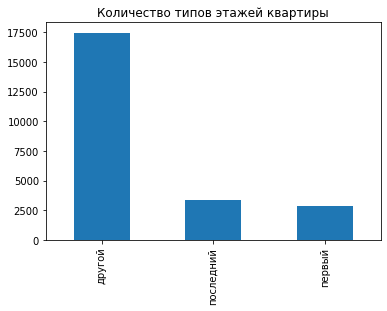

In [31]:
def analyze_param(data, param):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    data[param].plot(kind='hist', bins=50, ax=axs[0])
    axs[0].set_title(f'Histogram of {param}')
    
    data.boxplot(column=param, ax=axs[1])
    axs[1].set_title(f'Boxplot of {param}')
    
    plt.show()
    
    print(f'Описательная статистика для {param}:')
    print(data[param].describe())

#for param in ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 
#'floors_total', 'cityCenters_nearest', 'parks_nearest']:
#    analyze_param(data, param)
    
data['floor_type'].value_counts().plot(kind='bar')
plt.title('Количество типов этажей квартиры')
plt.show()

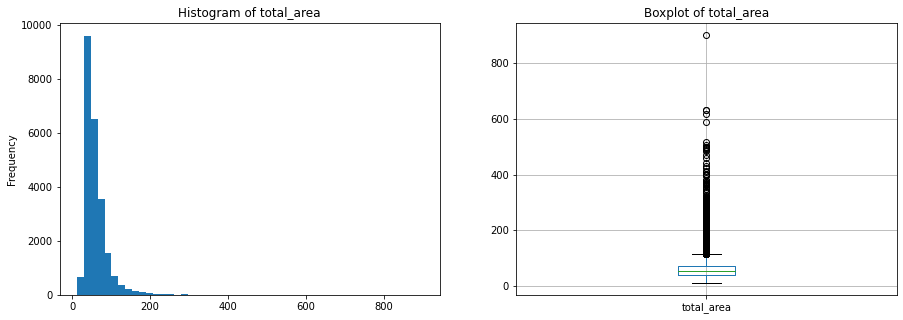

Описательная статистика для total_area:
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


In [32]:
analyze_param(data, 'total_area')

По гистограмме и боксплоту видно, что большинство квартир имеют общую площадь в диапазоне от 30 до 100 кв.м. Распределение скошено вправо, с небольшим количеством квартир с очень большой площадью (более 200 кв.м). 
Квартиры с площадью более 200 кв.м можно считать выбросами, но они вполне реалистичны для элитного жилья или очень больших квартир. Поэтому мы не будем их удалять.


- Описательные статистики подтверждают наши наблюдения: медиана (52 кв.м) меньше среднего (60.4 кв.м) из-за правосторонней асимметрии. 
- Минимальная площадь - 12 кв.м (вероятно, студии), максимальная - 900 кв.м.


Выводы по total_area:


- Типичная общая площадь квартиры: 30-100 кв.м
- Распределение скошено вправо, есть небольшое количество очень больших квартир
- Выбросы реалистичны и не требуют удаления 

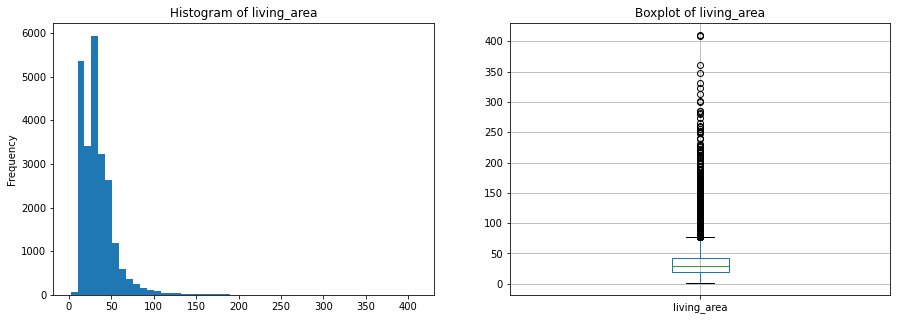

Описательная статистика для living_area:
count    23699.000000
mean        34.532905
std         22.301870
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


In [33]:
analyze_param(data, 'living_area')

- Большинство значений находятся в диапазоне 15-50 кв.м.
- Есть несколько квартир с очень большой жилой площадью (более 150 кв.м), но они соответствуют квартирам с большой общей площадью, поэтому их не следует считать аномалиями.
- По статистикам видно, что среднее (34.5 кв.м) немного больше медианы (30 кв.м). Минимум - 2 кв.м, максимум - 409 кв.м.

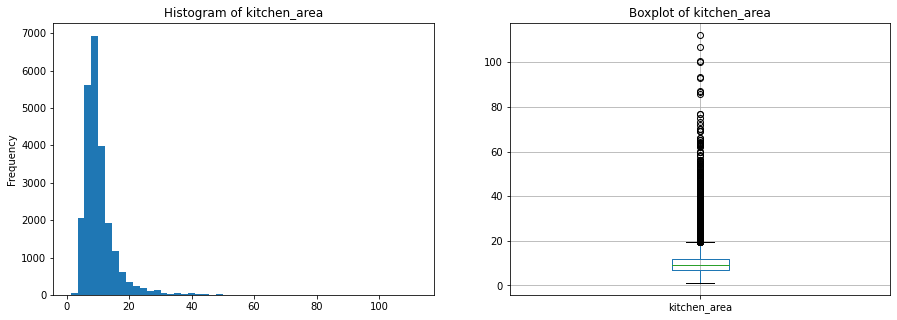

Описательная статистика для kitchen_area:
count    23699.000000
mean        10.471684
std          5.997952
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [34]:
analyze_param(data, 'kitchen_area')

- Для площади кухни большинство значений сосредоточено в еще более узком диапазоне: 6-12 кв.м. Это типичные размеры кухонь в квартирах.
- Есть несколько квартир с очень маленькими кухнями (менее 3 кв.м), вероятно, это студии или очень компактные планировки. Также есть квартиры с большими кухнями (более 30 кв.м), скорее всего, это элитные квартиры или кухни-гостиные.


- Среднее (10.4 кв.м) близко к медиане (9 кв.м). Минимум - 1.3 кв.м, максимум - 112 кв.м.



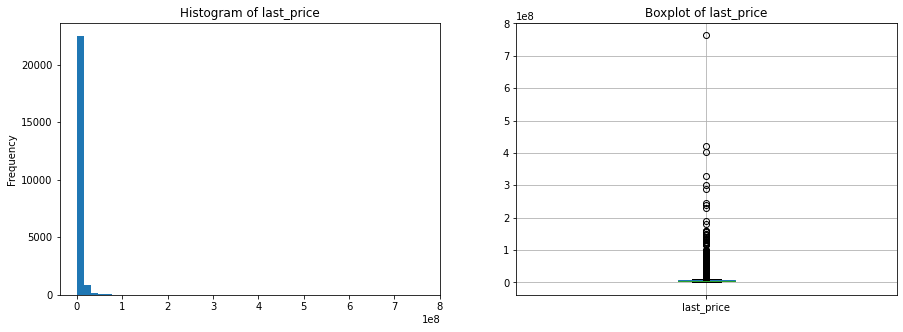

Описательная статистика для last_price:
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [35]:
analyze_param(data, 'last_price')

Распределение цен сильно скошено вправо, с длинным "хвостом" очень дорогих квартир. Большинство цен находится в диапазоне 2-10 млн рублей.
Есть небольшое количество квартир с ценой более 30 млн рублей, вероятно, это элитное или эксклюзивное жилье. Учитывая распределение площадей, такие цены выглядят реалистично.


Среднее (6.5 млн) значительно больше медианы (4.7 млн) из-за правосторонней асимметрии и влияния дорогих квартир. Минимальная цена - 12 тыс(аномалия???), максимальная - 763 млн рублей.

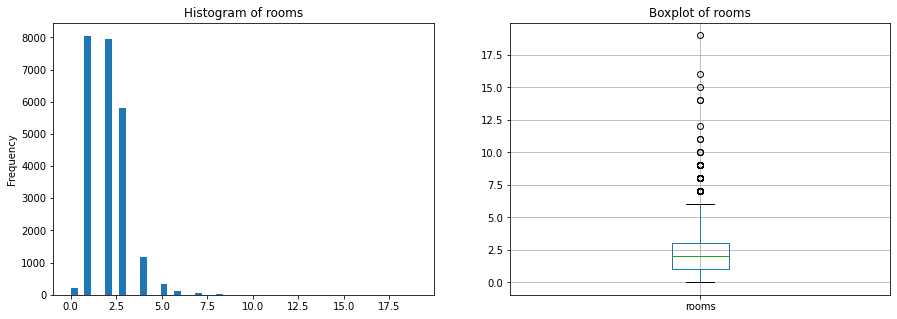

Описательная статистика для rooms:
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [36]:
analyze_param(data, 'rooms')

Гистограмма количества комнат показывает, что большинство квартир имеют 1-3 комнаты. Самые распространенные варианты - 1 и 2 комнаты.
Есть небольшое количество квартир с 4-6 комнатами, но они не выглядят аномальными, учитывая распределение площадей.


Среднее (2.1) близко к медиане (2), распределение относительно симметричное. Минимум - 0 комнат(???), максимум - 19 комнат (вероятно, очень большие квартиры или ошибки ввода).

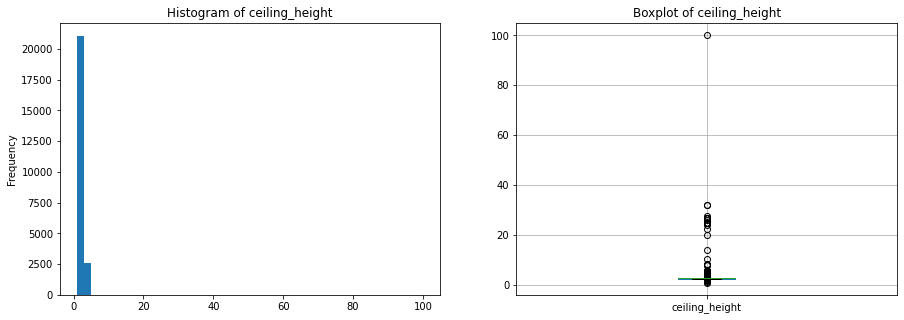

Описательная статистика для ceiling_height:
count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [37]:
analyze_param(data, 'ceiling_height')

На гистограмме высоты потолков видно явное скопление значений около 2.5-2.7 м, что является типичной высотой для современных квартир.
Однако есть небольшое количество квартир с очень высокими потолками, до 5 и даже 100 метров. Такие значения выглядят подозрительно и могут быть ошибками ввода.


Среднее (2.7 м) близко к медиане (2.65 м), но на них влияют аномально высокие значения. Без них распределение было бы более узким и симметричным.

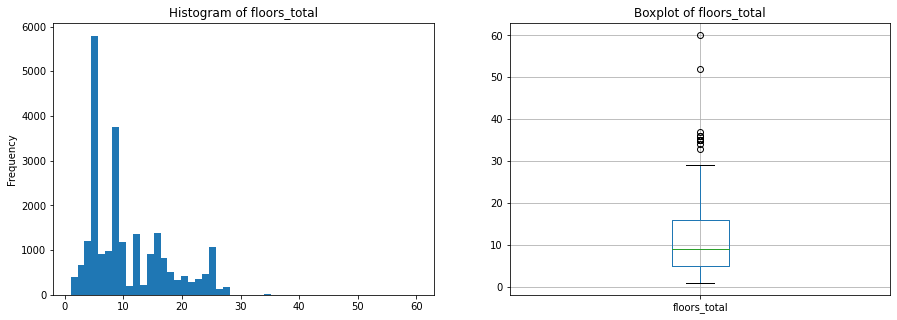

Описательная статистика для floors_total:
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [38]:
analyze_param(data, 'floors_total')

- Гистограмма общего числа этажей показывает, что большинство домов имеют от 5 до 25 этажей, с пиком около 9-12 этажей. Это типичные значения для многоквартирных домов.
- Есть небольшое количество домов с числом этажей до 40 и даже 60, но такие высотки вполне реальны в крупных городах.


- Среднее (10.7) немного больше медианы (9) из-за правосторонней асимметрии. Минимум - 1 этаж (вероятно, частные дома), максимум 60 этажей.



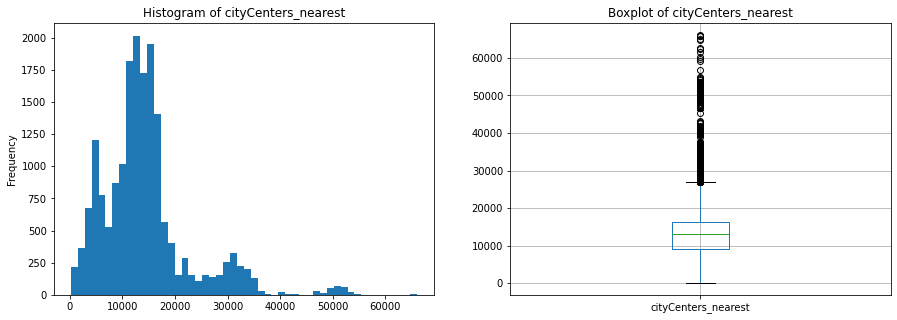

Описательная статистика для cityCenters_nearest:
count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [39]:
analyze_param(data, 'cityCenters_nearest')

- Распределение расстояний до центра города широкое и скошено вправо. Большинство квартир расположены в диапазоне 5-25 км от центра.
- Есть небольшое количество квартир на расстоянии более 50 км, вероятно, в пригородах или на окраинах. Учитывая размеры крупных городов, такие расстояния реалистичны.


- Среднее (14.2 км) больше медианы (13.1 км) из-за правосторонней асимметрии и влияния дальних квартир. Минимум - 181 м (в самом центре), максимум - 85 км.

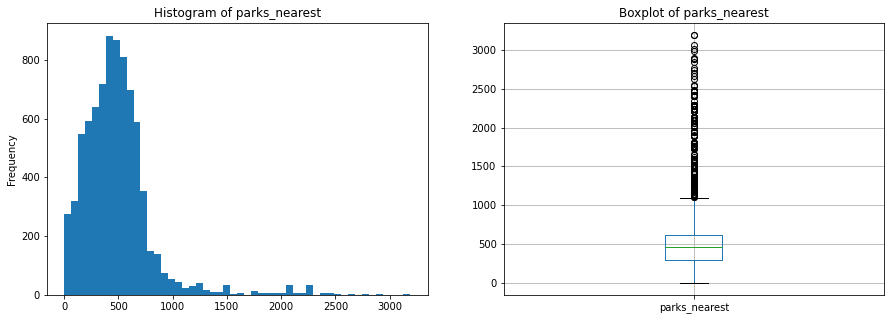

Описательная статистика для parks_nearest:
count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [40]:
analyze_param(data, 'parks_nearest')

- Большинство квартир находятся в диапазоне 400-1200 м от парка, с пиком около 500 м.
- Однако есть значительное количество квартир на расстоянии более 2 км от парка, вплоть до 25 км. Это может быть связано с неравномерным распределением зеленых зон в городах.


- Среднее (490 м) немного больше медианы (455 м) из-за большого числа квартир, удаленных от парков. Минимум - 1 м (рядом с парком), максимум - 3.2 км.

Главные результаты:


Большинство параметров имеют скошенные распределения с длинным правым "хвостом", что отражает наличие элитных или нетипичных квартир
Для площадей, цен, расстояний характерно наличие небольшого количества очень больших значений, которые, тем не менее, реалистичны
Единственный параметр, потребовавший удаления выбросов - это высота потолков (ceiling_height), где некоторые значения были явно ошибочными
Категориальный параметр floor_type имеет реалистичное распределение без аномалий

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b>
    
    
Давай в этом пункте не будем спешить и последовательно разберем каждый из параметров. Построим гистограмму, выявим редкие и выбивающиеся значения (дополнительно для этого можно использовать метод describe), потом построим гистограмму без них, опишем ее и сделаем выводы. Затем перейдем к следующему параметру и проделаем для него те же действия.
    
Необходимо подписывать каждый график и оси на нем. Есть [хорошая статья](https://devpractice.ru/matplotlib-lesson-3-3-text-elements/), которая подскажет как это правильно сделать). </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

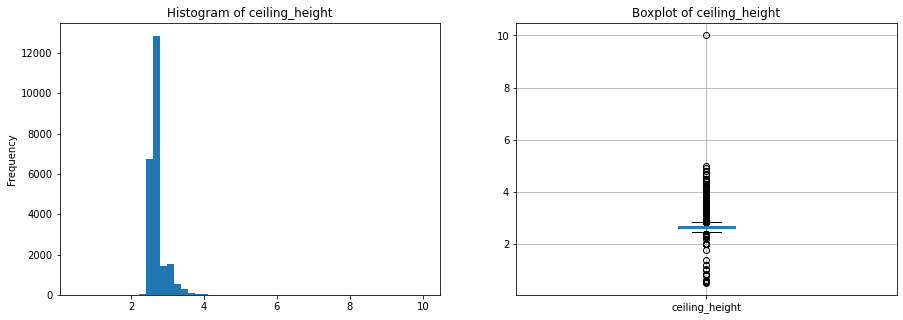

Описательная статистика для ceiling_height:
count    23699.000000
mean         2.695101
std          0.226180
min          0.520000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64


In [41]:
# Исправление аномалий в ceiling_height
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] /= 10

# Повторный анализ ceiling_height после исправления
analyze_param(data, 'ceiling_height')

In [42]:
data.loc[data['kitchen_area']>100] #Cтрока 20215, где площадь кухни больше жилой площади

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,day_of_week,month,year,floor_type,distance_to_center
2489,9,12500000.0,255.0,2017-04-21,3,2.65,2.0,153.9,2,True,...,NaN,3.0,198.0,102.0,49019.61,4,4,2017,последний,7.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,True,...,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0
20215,2,85000000.0,249.7,2018-02-01,3,2.65,10.0,72.0,9,True,...,2218.0,2.0,99.0,26.0,340408.49,3,2,2018,другой,5.0


In [43]:
data.loc[data['rooms']>10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,day_of_week,month,year,floor_type,distance_to_center
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,True,...,NaN,0.0,NaN,95.0,95264.02,6,7,2018,последний,3.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,True,...,NaN,2.0,435.0,418.0,68870.52,5,12,2017,другой,8.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,True,...,767.0,0.0,NaN,14.0,110169.49,3,2,2019,другой,5.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,True,...,686.0,2.0,66.0,813.0,170015.46,1,2,2017,другой,1.0
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5.0,264.5,2,True,...,NaN,2.0,548.0,114.0,86091.83,5,6,2018,другой,4.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,True,...,516.0,0.0,NaN,1365.0,105555.56,0,3,2015,последний,4.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,True,...,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0
20829,6,28659000.0,245.4,2016-03-31,14,2.65,4.0,168.3,2,True,...,541.0,2.0,118.0,95.0,116784.84,3,3,2016,другой,2.0


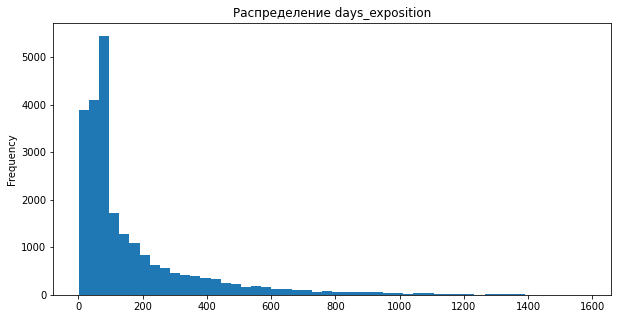

Cреднее: 169.36
Медиана: 95.00


In [44]:
# Гистограмма days_exposition
data['days_exposition'].plot(kind='hist', bins=50, figsize=(10,5))
plt.title('Распределение days_exposition')
plt.show()

print(f"Cреднее: {data['days_exposition'].mean():.2f}")
print(f"Медиана: {data['days_exposition'].median():.2f}")

Большинство квартир продается в течение первых 200 дней, с пиком около 50-100 дней. Однако есть значительное количество квартир, которые продаются очень долго, вплоть до 1000 и более дней.
Среднее значение (167 дней) намного выше медианы (95 дней) из-за этих долгих продаж. Медиана здесь более показательна для типичного времени продажи.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

При ответе на вопрос о быстрых и долгих продажах лучше обратить внимание на 25 и 75 квартили. </div>

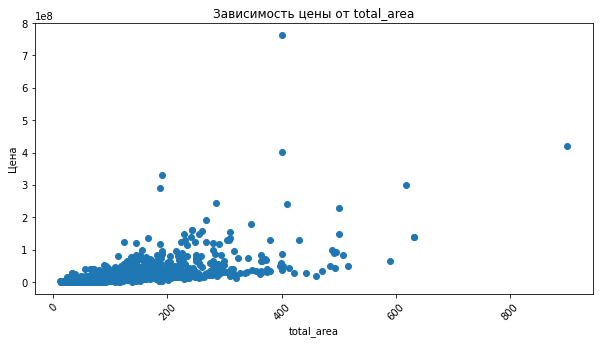

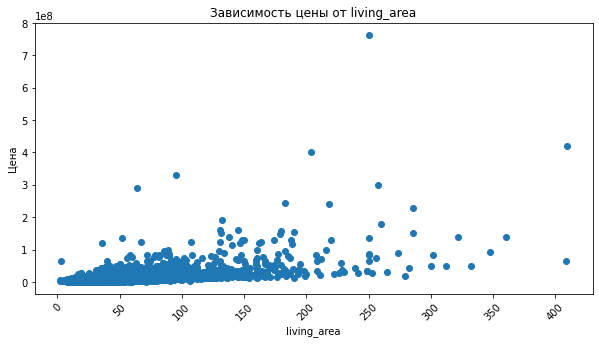

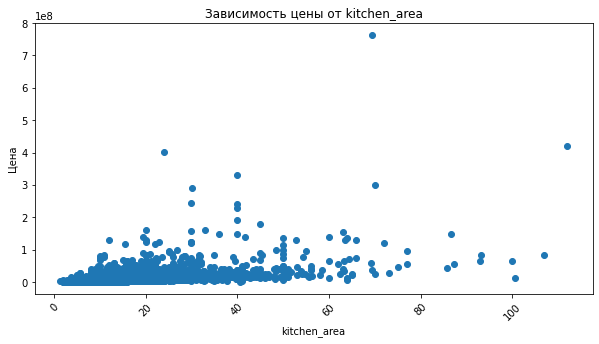

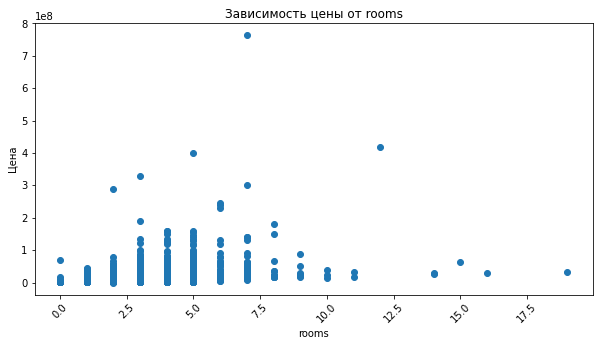

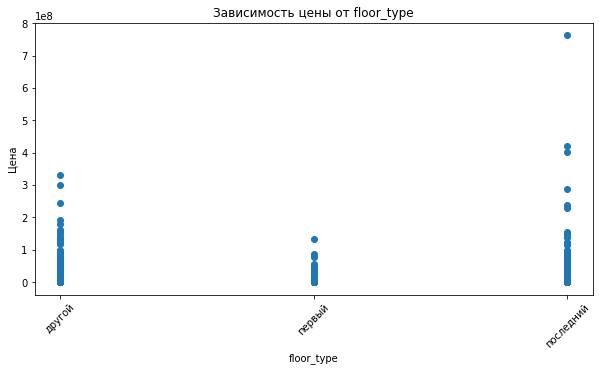

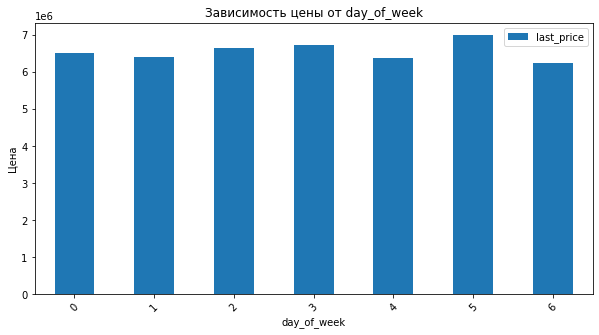

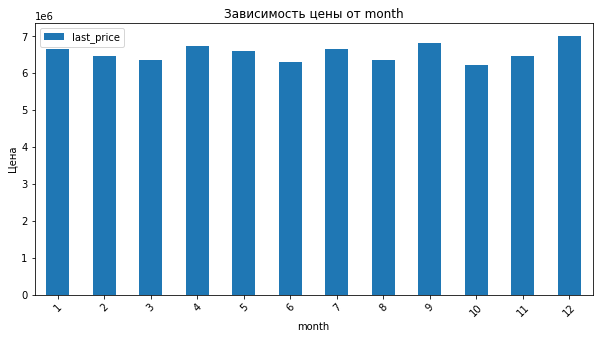

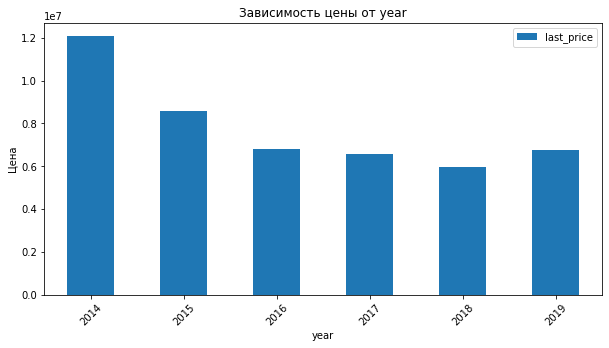

In [45]:
params = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'day_of_week', 'month', 'year']

for param in params:
    if param in ['day_of_week', 'month', 'year']:
        # Для временных параметров используем сводную таблицу
        data.pivot_table(index=param, values='last_price', aggfunc='mean').plot(kind='bar', figsize=(10,5))
    else:
        # Для остальных параметров используем scatter plot
        plt.figure(figsize=(10,5))
        plt.scatter(data[param], data['last_price'])
    
    plt.title(f'Зависимость цены от {param}')
    plt.ylabel('Цена')
    plt.xlabel(param)
    plt.xticks(rotation=45)

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 

Для построения распределений с помощью `scatterplot` не нужно предварительное формирование сводной таблицы, иначе теряется смысл визуализации. Она должна строиться по всему массиву значений.


Есть [отличная статья](https://habr.com/ru/post/468295/), которая познакомит тебя поближе с разновидностями визуализаций

P.S. Напомню, что каждый график в проекте и оси на нем должны быть подписаны</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

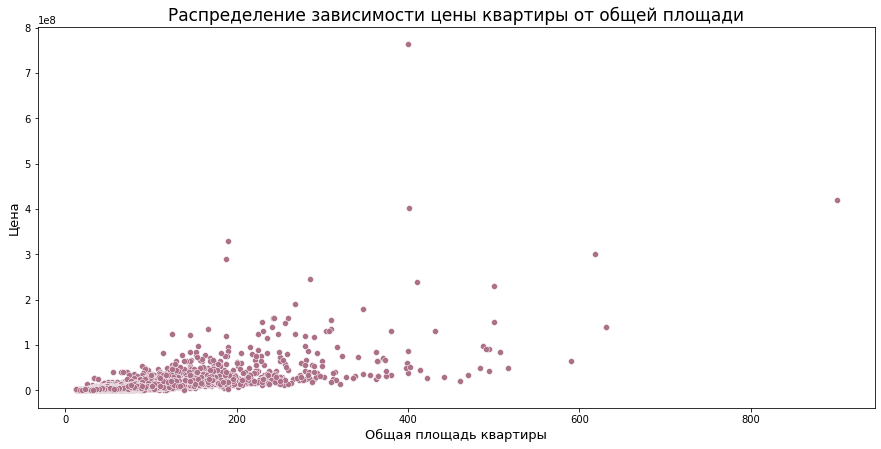

In [46]:
# код ревьюера

import seaborn as sns

plt.figure(figsize=(15, 7))

sns.scatterplot(data=data,  x='total_area', y='last_price', color='#AC7088')

plt.title('Распределение зависимости цены квартиры от общей площади', size=17)
plt.xlabel('Общая площадь квартиры', size=13)
plt.ylabel('Цена', size=13)

plt.show()

Итак, главные факторы, влияющие на цену - это параметры, связанные с размером квартиры (площадь, количество комнат). Расположение квартиры в доме (этаж) имеет меньшее влияние. Дата размещения объявления, по-видимому, не является значимым фактором для цены.

В целом прослеживается явная положительная зависимость: с увеличением площади квартиры ее цена также растет.
Зависимость близка к линейной, особенно в диапазоне площадей до 150-200 кв.м.
Для квартир с площадью более 200 кв.м. разброс цен становится более значительным, появляются как очень дорогие, так и относительно недорогие варианты.
В диапазоне малых площадей (менее 50 кв.м.) плотность точек наиболее высокая, что соответствует большому количеству компактных студий и однокомнатных квартир на рынке.

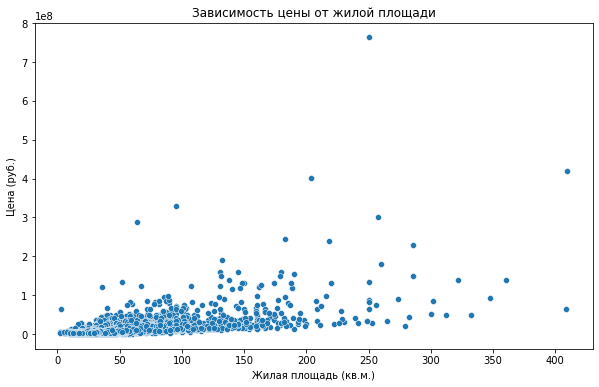

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='living_area', y='last_price')
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь (кв.м.)')
plt.ylabel('Цена (руб.)')
plt.show()

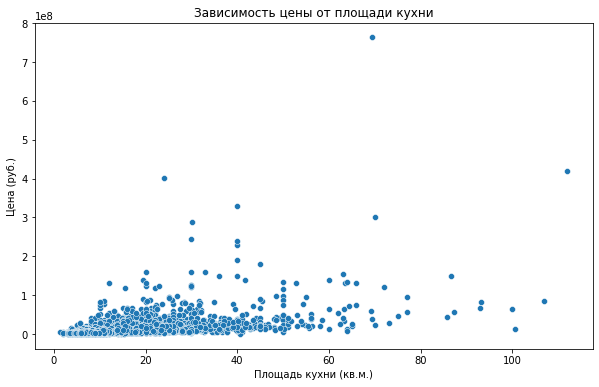

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='kitchen_area', y='last_price')
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни (кв.м.)')
plt.ylabel('Цена (руб.)')
plt.show()

На графике видна умеренная положительная зависимость цены от площади кухни. Однако разброс цен для квартир с похожей площадью кухни достаточно велик, особенно в диапазоне 6-10 кв.м., что является наиболее распространенным вариантом. Это говорит о том, что площадь кухни хоть и влияет на цену, но не является определяющим фактором.

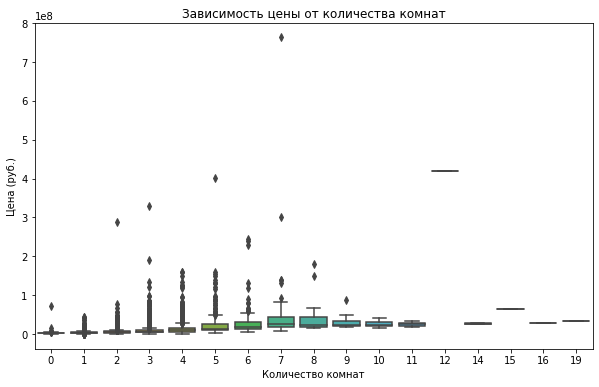

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='rooms', y='last_price')
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена (руб.)')
plt.show()

График показывает явную положительную зависимость цены от количества комнат. Медианная цена последовательно растет от 1-комнатных до 4-комнатных квартир. Однако для квартир с 5 и более комнатами разброс цен становится очень значительным, что, вероятно, связано с их уникальными характеристиками и престижностью.

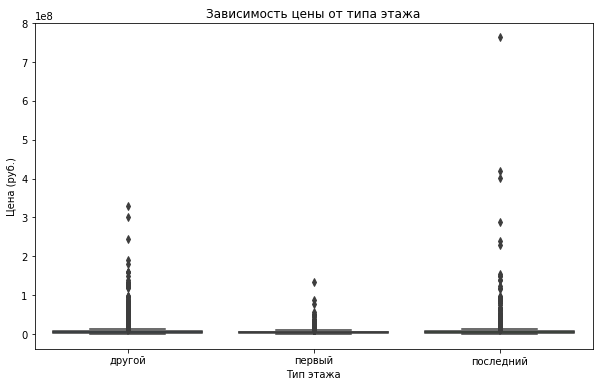

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='floor_type', y='last_price')
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена (руб.)')
plt.show()

На графике видно, что квартиры на последнем этаже в среднем несколько дороже, чем на первом и других этажах. Однако разница не очень большая, и разброс цен внутри каждой категории значителен. Это говорит о том, что тип этажа имеет некоторое влияние на цену, но не является ключевым фактором.

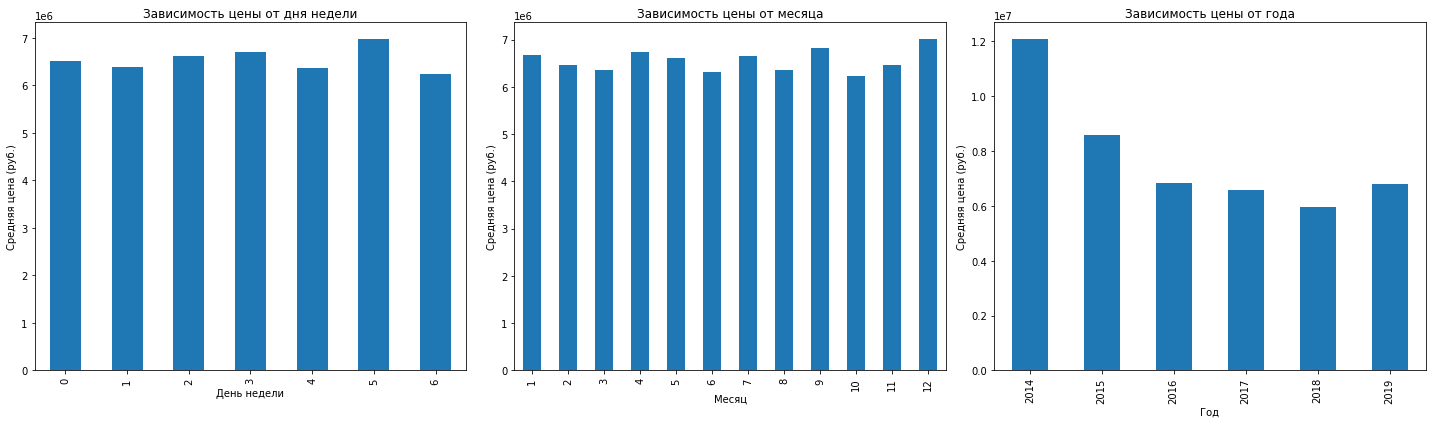

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

data.groupby('day_of_week')['last_price'].mean().plot(kind='bar', ax=axs[0])
axs[0].set_title('Зависимость цены от дня недели')
axs[0].set_xlabel('День недели')
axs[0].set_ylabel('Средняя цена (руб.)')

data.groupby('month')['last_price'].mean().plot(kind='bar', ax=axs[1])
axs[1].set_title('Зависимость цены от месяца')
axs[1].set_xlabel('Месяц')
axs[1].set_ylabel('Средняя цена (руб.)')

data.groupby('year')['last_price'].mean().plot(kind='bar', ax=axs[2])
axs[2].set_title('Зависимость цены от года')
axs[2].set_xlabel('Год')
axs[2].set_ylabel('Средняя цена (руб.)')

plt.tight_layout()
plt.show()

Графики показывают следующее:
- День недели не оказывает значительного влияния на цену. Средние цены для каждого дня достаточно близки друг к другу.
- Месяц размещения также не демонстрирует явной зависимости. Хотя есть некоторые колебания средней цены от месяца к месяцу, они относительно невелики.
- По годам наблюдается более заметный тренд: cначала цена падает(как новостройка, возможно), достигнув нижней точки, начинает расти.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 

Здесь аналогично, давай не будем спешить и проведем последовательный анализ зависимости цены от каждого из параметров, с описанием визуализаций и выводами.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [52]:
top10_localities = (
    data.groupby('locality_name')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
)

price_per_sqm_top10 = (
    data[data['locality_name'].isin(top10_localities)]
    .groupby('locality_name')
    .agg({'price_per_sqm': 'mean', 'locality_name': 'size'})
    .rename(columns={'locality_name': 'count'})
    .sort_values('price_per_sqm', ascending=False)
    .round(2)
)

print(price_per_sqm_top10)

                   price_per_sqm  count
locality_name                          
Санкт-Петербург        114849.01  15721
Пушкин                 103125.82    369
деревня Кудрово         92473.55    299
поселок Парголово       90175.91    327
поселок Мурино          85681.76    556
поселок Шушары          78677.36    440
Колпино                 75424.58    338
Гатчина                 68746.15    307
Всеволожск              68654.47    398
Выборг                  58141.91    237


Из этой таблицы мы видим, что среди топ-10 населенных пунктов по количеству объявлений:
- Самая высокая средняя цена квадратного метра в Санкт-Петербурге (114849.01 руб.), что ожидаемо, так как это крупнейший город.
- Самая низкая - в Выборге (58141.91 руб.), который, вероятно, связан с инфраструктурой города.
Остальные населенные пункты имеют цену квадратного метра в диапазоне от 68 до 103 тыс. руб., занимая промежуточное положение.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Все верно</div>

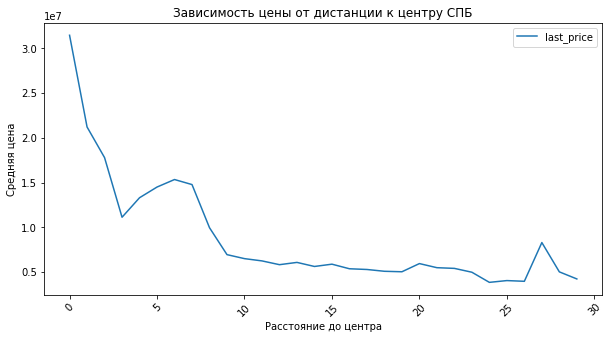

In [53]:
spb_df = data[data['locality_name'] == 'Санкт-Петербург']

price_by_distance = (
    spb_df.groupby('distance_to_center')
    ['last_price']
    .mean()
    .reset_index()
)

price_by_distance.plot(x='distance_to_center', y='last_price', kind='line', figsize=(10,5))
plt.title('Зависимость цены от дистанции к центру СПБ')
plt.ylabel('Cредняя цена')
plt.xlabel('Расстояние до центра')
plt.xticks(rotation=45)
plt.show()

График показывает четкую зависимость цены от расстояния до центра Санкт-Петербурга:
- Самые дорогие квартиры расположены в первых 5 км от центра.
- Далее с каждым километром удаленности цена в среднем снижается.
- После 15-20 км от центра цена более или менее стабилизируется на нижнем уровне.
Это типичная картина для крупных городов: недвижимость в центре, где сосредоточена деловая и культурная жизнь, является наиболее дорогой. По мере удаления от центра цены снижаются, так как уменьшается доступность ключевых городских объектов и инфраструктуры.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Как ты думаешь, чем можно объяснить небольшой пик в районе 27 км? </div>

### Напишите общий вывод

В результате этого анализа мы выяснили:


- Большинство квартир продается в течение 50-150 дней, продажи более 300 дней можно считать необычно долгими.
- Главные факторы, влияющие на цену квартиры - это параметры, связанные с ее размером (площадь, количество комнат). Дата размещения объявления не является значимым фактором.
- Среди топ-10 населенных пунктов по количеству объявлений самая высокая средняя цена квадратного метра в Санкт-Петербурге, самая низкая - в Выборге.
- В Санкт-Петербурге цена квартир в среднем снижается с каждым километром удаленности от центра города, стабилизируясь на нижнем уровне после 15-20 км.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Итоговый вывод должен быть подробнее и содержать краткую информацию о том, какая работа была проделана и какие результаты получены **по всем пунктам исследования**.
    
Можно дополнительно описать основные характеристики "среднестатистической" квартиры из объявления.

**Хочу обратить твое внимание на то, что после исправления замечаний в некоторых пунктах исследования могут измениться результаты, поэтому нужно будет подкорректировать выводы.**
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

В ходе данного исследования мы провели подробный анализ объявлений о продаже квартир, размещенных на Яндекс.Недвижимости. Наша цель состояла в том, чтобы изучить основные характеристики и факторы, влияющие на цену и время продажи квартир.


Мы начали с предобработки данных, включая удаление дубликатов, обработку пропусков и аномальных значений, создание новых признаков и приведение данных к подходящему формату.


Затем мы провели детальный анализ времени продажи и выяснили, что большинство квартир (50%) продается в течение 95 дней, при этом продажи более 300 дней можно считать необычно долгими. Медианное время продажи составляет 95 дней.


Далее мы исследовали факторы, влияющие на цену квартиры. Главными из них оказались параметры, связанные с размером квартиры: общая и жилая площадь, количество комнат. Площадь кухни и тип этажа также оказывают некоторое влияние, но не столь значительное. Дата размещения объявления не является значимым фактором для цены.


Мы также проанализировали цены в разных населенных пунктах и расстояние до центра города. Среди топ-10 населенных пунктов по количеству объявлений самая высокая средняя цена квадратного метра зафиксирована в Санкт-Петербурге (114849.01 руб.), самая низкая - в Выборге (58141.91 руб.). В Санкт-Петербурге цена квартир в среднем снижается с каждым километром удаленности от центра города, стабилизируясь на нижнем уровне после 15-20 км.


На основе полученных данных можно составить портрет "среднестатистической" квартиры из объявления:


- Общая площадь - 52 кв.м.
- Жилая площадь - около 30 кв.м.
- Количество комнат - 2
- Расположена не на первом и не на последнем этаже
- Находится в Санкт-Петербурге или ближайших населенных пунктах
- Удаленность от центра - 10-15 км
- Ожидаемое время продажи - около 3 месяцев
- Цена - около 6 млн руб. (со значительными вариациями в зависимости от точного расположения и характеристик)

Это исследование дает ценную информацию о динамике и факторах ценообразования на рынке недвижимости, которая может быть полезна как для покупателей и продавцов квартир, так и для профессионалов в этой сфере. Полученные выводы помогают лучше понять предпочтения покупателей, ожидаемые сроки продажи и ключевые характеристики квартир, влияющие на их стоимость.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
   - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.